<a href="https://colab.research.google.com/github/raina140291/disney/blob/master/SurveyDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DISNEY SURVEY DATA EXPLORATION**

### **Importing libraries**

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Cloning Github repository**

In [12]:
!git clone https://github.com/raina140291/disney.git temp
!mv -f temp/ThemePark.csv ThemePark.csv
!rm -rf temp

Cloning into 'temp'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 40 (delta 15), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


### **Reading Data**

In [19]:
df = pd.read_csv('ThemePark.csv', index_col = 0, sep=",")

In [14]:
df.columns

Index(['Visit_Year', 'Num_Adults', 'Num_Kids', 'Ticket_Source', 'Ticket_Type',
       'Stay_Length', 'Transport', 'Digital_Assets', 'Revisit_Concern',
       'Top_One', 'Top_Two', 'Giftshop_Concern', 'F&B_Concern',
       'Hotel_Concern', 'Themed_Concern', 'OSS_ROE', 'Cast_Concern',
       'Singlepath_Concern', 'Rides_Concern', 'Tempcheck_Concern',
       'Digitalline_Concern', 'EE_ROE', 'Potluck_ROE', 'Parade_ROE',
       'Newhotel_ROE', 'Gender', 'Age', 'Country'],
      dtype='object')

In [15]:
df.dtypes

Visit_Year              int64
Num_Adults              int64
Num_Kids                int64
Ticket_Source          object
Ticket_Type            object
Stay_Length            object
Transport              object
Digital_Assets         object
Revisit_Concern         int64
Top_One                object
Top_Two                object
Giftshop_Concern        int64
F&B_Concern             int64
Hotel_Concern           int64
Themed_Concern          int64
OSS_ROE                 int64
Cast_Concern            int64
Singlepath_Concern      int64
Rides_Concern           int64
Tempcheck_Concern       int64
Digitalline_Concern     int64
EE_ROE                  int64
Potluck_ROE             int64
Parade_ROE              int64
Newhotel_ROE            int64
Gender                 object
Age                    object
Country                object
dtype: object

In [20]:
#Encoding the Top one & two choices
lb_make = LabelEncoder()
df["Top_One"] = df["Top_One"].fillna('Missing')
df["Top_Two"] = df["Top_Two"].fillna('Missing')
df["Top_One_En"] = lb_make.fit_transform(df["Top_One"])
df["Top_Two_En"] = lb_make.fit_transform(df["Top_Two"])

### **Descriptive Analytics**

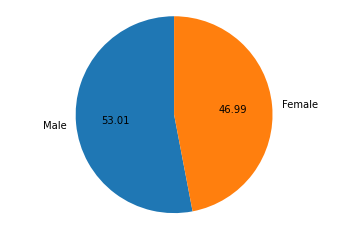

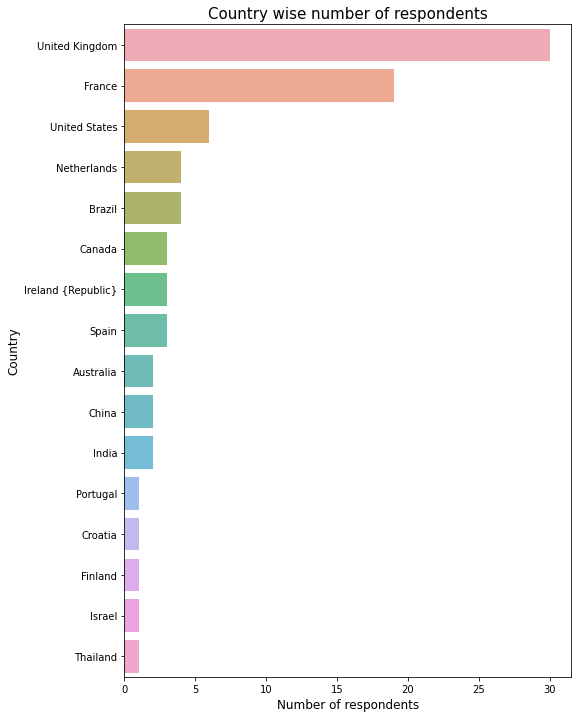

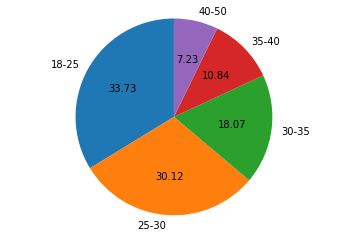

In [53]:
#GENDER
temp_series = df['Gender'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

figureObject, axesObject = plotter.subplots()
axesObject.pie(sizes,
        labels=labels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plotter.show()

#COUNTRY
cnt_srs = df['Country'].value_counts().head(25)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Country wise number of respondents", fontsize=15)
plt.show()

#AGE
cnt_srs = df['Age'].value_counts()
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

figureObject, axesObject = plotter.subplots()
axesObject.pie(sizes,
        labels=labels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plotter.show()

### **Principal Component Analysis**
We will use Principal Component Analysis (PCA) to do the dimensionality reduction. PCA can help us to identify patterns based on the correlation between features. To do this, we first select a list of “Active” input variables, to be used for the creation of the clusters. The remaining “Illustrative” variables will be used only for the interpretation of the clusters. 

In [30]:
X = df[['Top_One_En', 'Top_Two_En', 'Revisit_Concern','Giftshop_Concern', 'F&B_Concern',
        'Hotel_Concern', 'Themed_Concern', 'OSS_ROE', 'Cast_Concern', 'Singlepath_Concern', 
        'Rides_Concern', 'Tempcheck_Concern', 'Digitalline_Concern', 'EE_ROE', 'Potluck_ROE', 
        'Parade_ROE', 'Newhotel_ROE']]
pca = PCA(n_components = 2, random_state=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_.cumsum()[1]

0.46246210113194997

One drawback of using PCA is the new features generated by PCA will have less variance than the original features. This means we might lose some information and lower the predictive power of our model. In our case, we only managed to preserve ~60% of the variance which is less than ideal.


### **Agglomerative Clustering**
Agglomerative Clustering will assign each observation as individual cluster and merge those clusters based on their distance (similarity) pair by pair, iteratively. We will focus on Ward’s linkage algorithm which merges clusters that lead to minimum increase of Sum of Square Error (SSE).

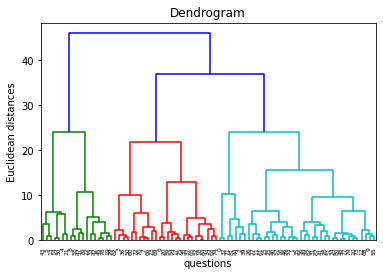

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram = dendrogram(linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

There are three colours : green, red and blue. This mean the best k number of clusters according to Ward’s linkage (method = ‘ward’) is three.

In [26]:
model = AgglomerativeClustering(n_clusters = 3, 
                          affinity ='euclidean', 
                          linkage ='ward')
y = model.fit_predict(X)

### **Cluster Analysis**

In [32]:
df['Cluster'] = y

In [33]:
df_cluster1 = df[df['Cluster']==0]
df_cluster2 = df[df['Cluster']==1]
df_cluster3 = df[df['Cluster']==3]

In [34]:
y

array([0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0])

# **FIN**

#### *Archived: KMeans* 

Since we have a mixture of scales and information, K-means (which assumes continuously distributed information only) is not an appropriate technique. KMeans always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Instead we use traditional PCA. 

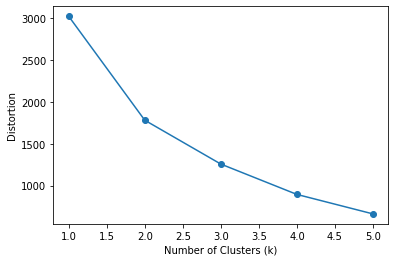

In [ ]:
distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)
plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
model = KMeans(
    n_clusters=2,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model = model.fit(X_pca)

y_kmeans = model.predict(X_pca)

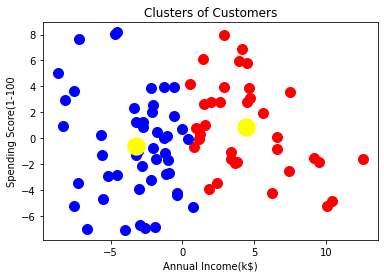

In [ ]:
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_pca[y_kmeans==3, 0], X_pca[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X_pca[y_kmeans==4, 0], X_pca[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

#### *Archived: 'Complete' Linkage Method* 

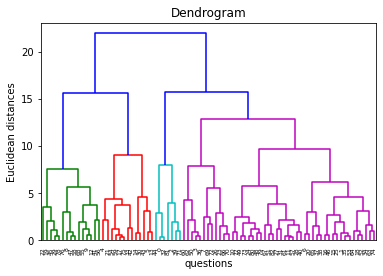

In [23]:
#Testing with a different linkage algorithm
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram = dendrogram(linkage(X_pca, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

#### *Archived: Dendrogram with non-PCA data* 

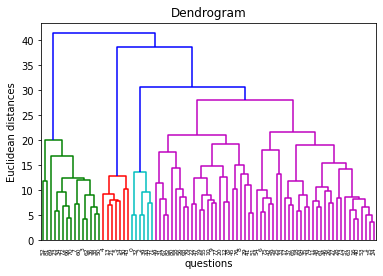

In [35]:
#Testing with non-PCA data
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram = dendrogram(linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()